<a href="https://colab.research.google.com/github/CabeludoCego/SistEvolutivos/blob/main/Enviado_AAC7_SPEA_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aluno: LUCAS LEMOS CARVALHO BATISTA

SPEA - Strenght Pareto Evolutionary Algorithm

O II implica uma segunda versão do algoritmo, apesar do SPEA e SPEA II serem completamente diferentes.

# SPEA II - PARA MIN-EX E MAX-EX

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as U
import math
import time

# Funções essenciais: SPEA-II

In [68]:
def fitnessMOMin(vt_real, Fit, pop):
  for i in range(pop):
    Fit[i,0] = vt_real[i][0]   # x1
    Fit[i,1] = ((1+ vt_real[i][1] )/ vt_real[i][0] ) # (1 + x2) / x1

In [69]:
def fitnessMOMax(vt_real, Fit, pop):
  for i in range(pop):
    Fit[i,0] = 1.1 - vt_real[i][0]   # x1
    Fit[i,1] = (60 - ((1+vt_real[i][1])/vt_real[i][0]))

In [70]:
def sortir(vetor, vetorIndices, elementos):
  indices = (np.argsort(vetorIndices, axis=0))
  n = len(vetor[0])
  vetorSortido = np.zeros((elementos,n))
  i = 0
  while i < elementos:
    vetorSortido[i] = vetor[int(indices[i])]
    i = i + 1
  return vetorSortido

In [71]:
# Gen 0: Usa pop
# Gen 1+: Usa Unisize
# LEN_A DEVE SER MENOR/IGUAL A ARQPOP

def FitnessSPEA(Fit, lenA, UniSize):
  vForca = np.zeros((UniSize,1), dtype=int)
  vR = np.zeros((UniSize,1), dtype=int)
  
  vDist = np.zeros((UniSize,1))
  vDensity = np.zeros((UniSize,1))
  kth = np.round(np.sqrt(UniSize))

  # Quantos domina
  for i in range(UniSize): 
    ni = 0
    for k in range(UniSize):
      tesT = ((Fit[i,0]) < Fit[k,0]) and ((Fit[i,1]) < Fit[k,1])
      if (tesT):  ni += 1                     
    vForca[i] = ni

  # Calculo de Força Bruta: R
  # Somar a Força dos que dominam ele
  for i in range(UniSize):
    sumR = 0
    for k in range(UniSize):
      tesT = ((Fit[i,0]) > Fit[k,0]) and ((Fit[i,1]) > Fit[k,1])
      if (tesT):  sumR += vForca[k]
    vR[i] = sumR

  # Objetivo: Minimizar vR

  # Determinar a estimativa de densidade

  for i in range(UniSize):
    for k in range(UniSize):
      vDist[k] = Fdist(Fit[i,:], Fit[k,:], fBounds[1], fBounds[0])
    vDist.sort()
    tetaK = vDist[int(kth)]
    vDensity[i] = 1/(tetaK + 2)

  # Cálculo da fit do método
  # Se alterar lenA e voltar, quebra
  Fit_SPEA = np.zeros((UniSize,1))

  for i in range(UniSize):
    Fit_SPEA[i] = vDensity[i] + vR[i] 
  return Fit_SPEA

In [72]:
# Gen 0: Usa pop
# Gen 1+: Usa Unisize
def FitnessSPEAMax(Fit, lenA, UniSize):
  vForca = np.zeros((UniSize,1), dtype=int)
  vR = np.zeros((UniSize,1), dtype=int)
  
  vDist = np.zeros((UniSize,1))
  vDensity = np.zeros((UniSize,1))
  kth = np.round(np.sqrt(UniSize))

  # Quantos domina
  for i in range(UniSize): 
    ni = 0
    for k in range(UniSize):
      tesT = ((Fit[i,0]) > Fit[k,0]) and ((Fit[i,1]) > Fit[k,1])
      if (tesT):  ni += 1                     
    vForca[i] = ni

  # Calculo de Força Bruta: R
  # Somar a Força dos que dominam ele
  for i in range(UniSize):
    sumR = 0
    for k in range(UniSize):
      tesT = ((Fit[i,0]) < Fit[k,0]) and ((Fit[i,1]) < Fit[k,1])
      if (tesT):  sumR += vForca[k]
    vR[i] = sumR

  # Objetivo: Minimizar vR

  # Determinar a estimativa de densidade

  for i in range(UniSize):
    for k in range(UniSize):
      vDist[k] = Fdist(Fit[i,:], Fit[k,:], fBounds[1], fBounds[0])
    vDist.sort()
    tetaK = vDist[int(kth)]
    vDensity[i] = 1/(tetaK + 2)

  # Cálculo da fit do método
  Fit_SPEA = np.zeros((UniSize,1))

  for i in range(UniSize):
    Fit_SPEA[i] = vDensity[i] + vR[i] 
  return Fit_SPEA

In [73]:
def SelecaoSPEA(vt_bin_s, Fit_s, Fit_SPEA_s,arqpop):
  # Passo 1:Identificar elementos entre 0 e 1
  # arqpop = 20
  Arquivo = []
  Arq_FitSPEA = []
  ArquivoFit = []

  TopRank = 0   
  for i in Fit_SPEA_s:
    if i <= 1:  
      TopRank += 1
    else:
      break
  
  # Passo 2: Anexar elementos contabilizados em TopRank
  # Se arquivo tem espaço, anexar mais um
  # Se arquivo não tem mais espaço, anexar e remover um de acordo com distância aos pontos
  # Se ao fim, ainda há espaço, Passo 3
  
  Dist_desempate = np.zeros((arqpop,1)) # Quando é calculado, tem 21 individuos
  # desempate dentro do Arquivo
  for i in range(TopRank):  # Do elemento 1 ao ultimo no topo dos ranks
    Arquivo.append(vt_bin_s[i,:])
    Arq_FitSPEA.append(Fit_SPEA_s[i])
    ArquivoFit.append(Fit_s[i,:])
    # Verificar se encheu
    lenA = len(Arquivo)
    # if(lenA > pop):         # Se encheu, e ainda tem indivíduos do topo:
    if(lenA > arqpop):         # Se encheu, e ainda tem indivíduos do topo:
      minDist = np.inf
      # Calcula-se a distância em pares de todos os indivíduos e se busca a menor. 
      for k in range(0,lenA-1):  # Grupo tem (lenA) individuos = (pop + 1) 
        Dist_desempate[k] = Fdist(ArquivoFit[k], ArquivoFit[k+1], fBounds[1], fBounds[0])
        if Dist_desempate[k] < minDist:
          minDist = Dist_desempate[k]   # Atualiza menor distância verificada
          ki = k  
      # Remover o indice ki do arquivo
      Arquivo.pop(ki)
      Arq_FitSPEA.pop(ki)
      ArquivoFit.pop(ki)
  
  # Etapa 3: Adicionar indivíduos restantes
  # só deve ocorrer nas primeiras gerações
  # if(lenA < pop):
  if(lenA < arqpop):   
    for i in range(TopRank,pop):
      Arquivo.append(vt_bin_s[i,:])
      Arq_FitSPEA.append(Fit_SPEA_s[i])
      ArquivoFit.append(Fit_s[i,:])
      # Verificar se encheu
      lenA = len(Arquivo)
      # if(lenA >= pop):      
      if(lenA >= arqpop):
        # print('Encerrado')
        break
  
  return [Arquivo, Arq_FitSPEA, ArquivoFit]

In [74]:
def Fdist(x,y, xmax, xmin):
  d = 0
  a = 0
  for i in range(nx):
    a += ( ( (x[i] - y[i])/(xmax[i] - xmin[i]) )**2)
  d = np.sqrt(a)
  return d

In [75]:
def bin2real(b, xmin, xmax):
  # Conversão de inteiro para binário
  s = 0
  n = len(b)        # [s1,l] => Pega a dimensão 2
  for l in range(n):
    s = s + b[l]*pow(2,l)
  return xmin + (xmax - xmin)*s/(pow(2,n)-1)

In [76]:
# Criar divisor de bits a serem usados!
def xj_range(bits, nx):
  limites_xj = np.zeros((2,nx), dtype=int)
  cont = 0
  ik = bits
  while ik <= (bits*nx):
    
    if ((ik) % bits == 0):    # Se ik for divisível por 20
      
      limites_xj[1,cont] = ik-1  # Atribui ub: 20, 40, 60, 80 (-1)
      cont = cont + 1            # incrementa
      if (cont < nx):
        limites_xj[0,cont] = ik # Atribui lb: 20, 40, 60 (-1)
      
    ik = ik + 1
  return limites_xj

In [77]:
# Dividir X em nx parcelas de acordo com o limite em Xj_range
# Supondo X = vt[i,:]

def xj_divide(X, bits, nx):
  limites = xj_range(bits,nx)

  Xt = np.zeros((nx,bits), dtype=int)
  i = 0
  for i in range (nx):
    Xt[i,:] = X[limites[0,i]:(limites[1,i]+1)]
                                    # -> [0:19], python pega do 0 ao 18.
                                    # O +1 resolve o problema
  return Xt

In [78]:
def Bin_xyzw_Real(vetor_bin, vetor_real, pop, xmin, xmax):
  for i in range(pop):
    Xj = vetor_bin[i,:]              # Extrai um individuo da pop
    Xj_r = xj_divide(Xj, bits, nx)  # Leva para dividir nas N componentes dela (x,y,z,w)
                            # Passa cada componente para valor real
    Xj_r = np.transpose(Xj_r)
    k = 0
    for k in range (nx):
      vetor_real[i,k] = bin2real(Xj_r[:,k], xmin[k], xmax[k])

In [79]:
def criarpop(vetor, pop, cromo):
  #i = 0
  for i in range(pop):                 # Cria-se uma linha(indivíduo) por vez
    n = (np.random.rand(1,cromo))      # Vetor randômico de números entre 0 e 1
    nr = np.around(n, 0)               # Arrendondam-se entre 0 e 1
    vetor[i,:] = nr[:]

In [80]:
def torneio(Fit_Especial,k):
  # Especial: Escalonada, compartilhada
  melhor_fitness = -1
  vencedor = -1
  for i in range(k):
    competidor = U.randint(0,len(Fit_Especial)-1)
    if Fit_Especial[competidor] > melhor_fitness:
      melhor_fitness = Fit_Especial[competidor]
      vencedor = competidor
  return vencedor

In [81]:
def torneioMin(Fit_Especial,k):
  # Especial: Escalonada, compartilhada
  melhor_fitness = np.inf
  vencedor = -1
  for i in range(k):
    competidor = U.randint(0,len(Fit_Especial)-1)
    if Fit_Especial[competidor] < melhor_fitness:
      melhor_fitness = Fit_Especial[competidor]
      vencedor = competidor
  return vencedor

In [82]:
def selecao_maximizar(FitComp, pop):
  i_selecionados = np.zeros((pop,1), dtype=int)
  for k in range(pop):
    i_selecionados[k] = torneio(FitComp, 3)
  return i_selecionados

In [83]:
def selecao_minimizar(FitComp, pop):
  i_selecionados = np.zeros((pop,1), dtype=int)
  for k in range(pop):
    i_selecionados[k] = torneioMin(FitComp, 3)
  return i_selecionados

In [84]:
def criaPares(pop, arqpop, indicesSelec):
  vetor_pares = np.zeros((pop,2), dtype=int) # Indices dos pares 
  for p in range(pop):   # Preencher todos os filhos
    for k in range(2):              # Escolher 2 dos selecionados de forma randomica
      r = int(np.floor(arqpop*(U.random())))
      vetor_pares[p,k] = indicesSelec[r]
    if vetor_pares[p,k] == vetor_pares[p,k-1]:
      r = int(np.floor(arqpop*(U.random())))
      vetor_pares[p,k] = indicesSelec[r]      
  return vetor_pares

In [85]:
def cruzamentoDoisPontos(P_1, P_2, Filho):
  r = U.random()
  if r <= Px:
    rng2 = np.random.default_rng()
    ponto1 = rng2.integers(cromo, size=1)
    ponto2 = rng2.integers(cromo, size=1)
    [maior,menor] = [np.max([ponto1,ponto2]),np.min([ponto1,ponto2])]
    mask = np.zeros(cromo,dtype=int)
    for j in range(menor,maior):
      mask[j] = 1
    # realiza o crossover
    for jj in range(cromo):
      if mask[jj] == 1:
        Filho[jj] = P_1[jj]
      else:
        Filho[jj] = P_2[jj]
  return Filho

In [86]:
def cruzamento(vetor_bin_S, indice_pares, filhos, Px):
  # 20 binarios geram 40 filhos
  for i in range(pop):
    r = U.random()  # Porcentagem de crossover
    if (r <= Px):
      P_1 = vetor_bin_S[indice_pares[i,0]]
      P_2 = vetor_bin_S[indice_pares[i,1]]
      filhos[i,:] = cruzamentoDoisPontos(P_1, P_2, filhos[i,:])
    else:
      filhos[i,:] = vetor_bin_S[indice_pares[i,0]]
  # Se não tiver crossover, ele simplesmente deixa o filho como estava.

In [87]:
# Taxa de mutação: Pm = 0.02
def mutacao(filho, cromo, Pm):
  for i in range(cromo):
    r = U.random()    # Porcentagem de crossover
    if (r < Pm):     
      filho[i] = int(not filho[i]) # Inversão com porta NOT, depois converte pra int
  return filho

# SPEA2 - MinEx em Loop

Geração 0: Fora do loop

In [88]:
pop = 40
arqpop = 20
MaxGen = 100
bits = 30
nx = 2
M = 2    # Funções MO
cromo = bits*nx
Px = 0.90
Pm = 0.02

limXY =  [[0.1, 0],    # X, Y   # Min
          [1  , 5]]             # Max
xmin  = limXY[0]
xmax  = limXY[1]

fBounds = [[0.1,  0],    # X, Y   # Min
           [1  , 60]]             # Max


# Criação de vetores
vt_bin = np.zeros((pop, cromo), dtype=int)
vt_real = np.zeros((pop, nx), dtype=float)
Fit = np.zeros((pop,M))
#vForca = np.zeros((pop,1), dtype=int)

Arquivo = []
Arq_FitSPEA = []
ArquivoFit = []

vArq_FitSPEA = np.zeros((arqpop,1))
vArquivo = np.zeros((arqpop,cromo),dtype=int)

lenA = 0

filhos = np.zeros((pop, cromo), dtype=int)

In [89]:
# Inicializar e calcular as fitness multiobjetivo
criarpop(vt_bin, pop, cromo)
#print(vt_bin[0:3,:])

# Conversão em Real e Cálculo de Fitness
Bin_xyzw_Real(vt_bin, vt_real, pop, xmin, xmax)

fitnessMOMin(vt_real, Fit, pop)

UniSize = pop + lenA
Fit_SPEA = FitnessSPEA(Fit, lenA, UniSize)

Fit_SPEA_s = sortir(Fit_SPEA, Fit_SPEA, UniSize)
vt_bin_s = sortir(vt_bin, Fit_SPEA, pop)
Fit_s = sortir(Fit, Fit_SPEA, pop)

In [90]:
[Arquivo, Arq_FitSPEA, ArquivoFit] = SelecaoSPEA(vt_bin_s, Fit_s, Fit_SPEA_s,arqpop)

for i in range(arqpop):
  vArq_FitSPEA[i,:] = Arq_FitSPEA[i]
  vArquivo[i,:] = Arquivo[i]

# Seleção direto do Arquivo
i_selecionados = selecao_minimizar(vArq_FitSPEA,arqpop)  # Selecionar 20 deles

# Cruzamento e Mutação
paresRep = criaPares(pop, arqpop, i_selecionados)             # Precisa gerar 40
cruzamento(vArquivo, paresRep, filhos, Px)      # Crossover
for i in range(pop):                          
  filhos[i,:] = mutacao(filhos[i,:],cromo,Pm)
vt_bin = filhos
lenA = len(vArquivo)

In [91]:
# Arquivo_real = np.zeros((arqpop, nx), dtype=float)

# Bin_xyzw_Real(vArquivo, Arquivo_real, arqpop, xmin, xmax)
# Fit_fim = np.zeros((arqpop,nx), dtype=float)
# fitnessMOMin(Arquivo_real, Fit_fim, arqpop)
# print(Fit_fim[0:4])

# fig1, ax1 = plt.subplots()
# ax1.scatter(Fit_fim[:,0], Fit_fim[:,1])
# plt.title('Problema sei la - QT2')
# plt.show()

O Loop

In [92]:
gen = 0
UniSize = pop + lenA
vUnion = np.zeros((UniSize, cromo), dtype=int)
vUnion_real = np.zeros((UniSize, nx), dtype=float)
Fit_Union = np.zeros((UniSize,M))

while gen < MaxGen:

  # Reunir vt_bin e vArquivo
  for i in range(UniSize):
    if (i < arqpop):
      vUnion[i,:] = vArquivo[i,:]
    else:
      vUnion[i,:] = vt_bin[i-arqpop,:]

  Bin_xyzw_Real(vUnion, vUnion_real, UniSize, xmin, xmax)

  fitnessMOMin(vUnion_real, Fit_Union, UniSize)
  
  # Recebe e calcula para Arquivo e vt_bin.
  Fit_SPEA = FitnessSPEA(Fit_Union, lenA, UniSize)

  # Isto implica que Fit_SPEA é originalmente de tamanho UniSize
  Fit_SPEA_s = sortir(Fit_SPEA, Fit_SPEA, UniSize)
  vUnion_s = sortir(vUnion, Fit_SPEA, UniSize)
  Fit_Union_s = sortir(Fit_Union, Fit_SPEA, UniSize)

  # Recebe 60, retorna 30 (novo Arquivo)
  #print('Geracao numero' + str(gen))
  [Arquivo, Arq_FitSPEA, ArquivoFit] = SelecaoSPEA(vUnion_s, Fit_Union_s, Fit_SPEA_s,arqpop)

  for i in range(arqpop):
    vArq_FitSPEA[i,:] = Arq_FitSPEA[i]
    vArquivo[i,:] = Arquivo[i]

  # Seleção direto do Arquivo
  i_selecionados = selecao_minimizar(vArq_FitSPEA,arqpop)

  # Cruzamento e Mutação
  paresRep = criaPares(pop, arqpop, i_selecionados)
  cruzamento(vArquivo, paresRep, filhos, Px)      # Crossover
  for i in range(pop):                          
    filhos[i,:] = mutacao(filhos[i,:],cromo,Pm)
  
  vt_bin = filhos
  gen += 1

[[0.94375935 1.06005808]
 [0.8756393  1.1445735 ]
 [0.81763551 1.22577057]
 [0.76841665 1.30686619]]


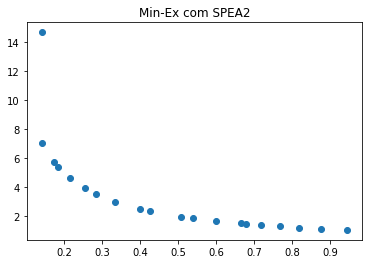

In [93]:
Arquivo_real = np.zeros((arqpop, nx), dtype=float)

Bin_xyzw_Real(vArquivo, Arquivo_real, arqpop, xmin, xmax)
Fit_fim = np.zeros((arqpop,nx), dtype=float)
fitnessMOMin(Arquivo_real, Fit_fim, arqpop)
print(Fit_fim[0:4])

fig1, ax1 = plt.subplots()
ax1.scatter(Fit_fim[:,0], Fit_fim[:,1])
plt.title('Min-Ex com SPEA2')
plt.show()

# SPEA2 - MaxEx em Loop

Geração 0: Fora do loop

In [94]:
pop = 40
arqpop = 20
MaxGen = 100
bits = 30
nx = 2
M = 2    # Funções MO
cromo = bits*nx
Px = 0.90
Pm = 0.02

limXY =  [[0.1, 0],    # X, Y   # Min
          [1  , 5]]             # Max
xmin  = limXY[0]
xmax  = limXY[1]

fBounds = [[0.1,  0],    # X, Y   # Min
           [1  , 60]]             # Max


# Criação de vetores
vt_bin = np.zeros((pop, cromo), dtype=int)
vt_real = np.zeros((pop, nx), dtype=float)
Fit = np.zeros((pop,M))
#vForca = np.zeros((pop,1), dtype=int)

Arquivo = []
Arq_FitSPEA = []
ArquivoFit = []

vArq_FitSPEA = np.zeros((arqpop,1))
vArquivo = np.zeros((arqpop,cromo),dtype=int)

lenA = 0

filhos = np.zeros((pop, cromo), dtype=int)

In [95]:
# Inicializar e calcular as fitness multiobjetivo
criarpop(vt_bin, pop, cromo)
#print(vt_bin[0:3,:])

# Conversão em Real e Cálculo de Fitness
Bin_xyzw_Real(vt_bin, vt_real, pop, xmin, xmax)

fitnessMOMin(vt_real, Fit, pop)

UniSize = pop + lenA
Fit_SPEA = FitnessSPEA(Fit, lenA, UniSize)

Fit_SPEA_s = sortir(Fit_SPEA, Fit_SPEA, UniSize)
vt_bin_s = sortir(vt_bin, Fit_SPEA, pop)
Fit_s = sortir(Fit, Fit_SPEA, pop)

In [96]:
[Arquivo, Arq_FitSPEA, ArquivoFit] = SelecaoSPEA(vt_bin_s, Fit_s, Fit_SPEA_s,arqpop)

for i in range(arqpop):
  vArq_FitSPEA[i,:] = Arq_FitSPEA[i]
  vArquivo[i,:] = Arquivo[i]

# Seleção direto do Arquivo
i_selecionados = selecao_minimizar(vArq_FitSPEA,arqpop)  # Selecionar 20 deles

# Cruzamento e Mutação
paresRep = criaPares(pop, arqpop, i_selecionados)             # Precisa gerar 40
cruzamento(vArquivo, paresRep, filhos, Px)      # Crossover
for i in range(pop):                          
  filhos[i,:] = mutacao(filhos[i,:],cromo,Pm)
vt_bin = filhos
lenA = len(vArquivo)

In [97]:
# Arquivo_real = np.zeros((arqpop, nx), dtype=float)

# Bin_xyzw_Real(vArquivo, Arquivo_real, arqpop, xmin, xmax)
# Fit_fim = np.zeros((arqpop,nx), dtype=float)
# fitnessMOMin(Arquivo_real, Fit_fim, arqpop)
# print(Fit_fim[0:4])

# fig1, ax1 = plt.subplots()
# ax1.scatter(Fit_fim[:,0], Fit_fim[:,1])
# plt.title('Problema sei la - QT2')
# plt.show()

O Loop

In [98]:
gen = 0
UniSize = pop + lenA
vUnion = np.zeros((UniSize, cromo), dtype=int)
vUnion_real = np.zeros((UniSize, nx), dtype=float)
Fit_Union = np.zeros((UniSize,M))

while gen < MaxGen:

  # Reunir vt_bin e vArquivo
  for i in range(UniSize):
    if (i < arqpop):
      vUnion[i,:] = vArquivo[i,:]
    else:
      vUnion[i,:] = vt_bin[i-arqpop,:]

  Bin_xyzw_Real(vUnion, vUnion_real, UniSize, xmin, xmax)

  fitnessMOMin(vUnion_real, Fit_Union, UniSize)
  
  # Recebe e calcula para Arquivo e vt_bin.
  Fit_SPEA = FitnessSPEA(Fit_Union, lenA, UniSize)

  # Isto implica que Fit_SPEA é originalmente de tamanho UniSize
  Fit_SPEA_s = sortir(Fit_SPEA, Fit_SPEA, UniSize)
  vUnion_s = sortir(vUnion, Fit_SPEA, UniSize)
  Fit_Union_s = sortir(Fit_Union, Fit_SPEA, UniSize)

  # Recebe 60, retorna 30 (novo Arquivo)
  #print('Geracao numero' + str(gen))
  [Arquivo, Arq_FitSPEA, ArquivoFit] = SelecaoSPEA(vUnion_s, Fit_Union_s, Fit_SPEA_s,arqpop)

  for i in range(arqpop):
    vArq_FitSPEA[i,:] = Arq_FitSPEA[i]
    vArquivo[i,:] = Arquivo[i]

  # Seleção direto do Arquivo
  i_selecionados = selecao_minimizar(vArq_FitSPEA,arqpop)

  # Cruzamento e Mutação
  paresRep = criaPares(pop, arqpop, i_selecionados)
  cruzamento(vArquivo, paresRep, filhos, Px)      # Crossover
  for i in range(pop):                          
    filhos[i,:] = mutacao(filhos[i,:],cromo,Pm)
  
  vt_bin = filhos
  gen += 1

[[ 0.14218746 58.95423848]
 [ 0.19249777 58.87486807]
 [ 0.25467622 58.81699499]
 [ 0.315859   58.72273256]]


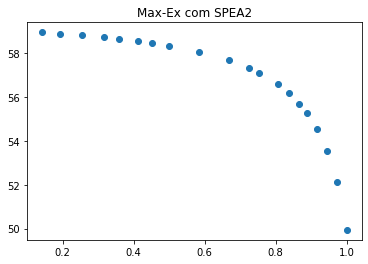

In [99]:
Arquivo_real = np.zeros((arqpop, nx), dtype=float)

Bin_xyzw_Real(vArquivo, Arquivo_real, arqpop, xmin, xmax)
Fit_fim = np.zeros((arqpop,nx), dtype=float)
fitnessMOMax(Arquivo_real, Fit_fim, arqpop)
print(Fit_fim[0:4])

fig1, ax1 = plt.subplots()
ax1.scatter(Fit_fim[:,0], Fit_fim[:,1])
plt.title('Max-Ex com SPEA2')
plt.show()